# Real Estate Price prediction Based on Age

1.	Load the basic libraries and packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Load the dataset

In [ ]:
dataset = pd.read_excel('/content/Post_Lab_Dataset.xlsx')
dataset.head()

,House_Age,Price_Per_Unit_Area
0,32.0,37.9
1,19.5,42.2
2,13.3,47.3
3,13.3,54.8
4,5.0,43.1


3.	Analyse the dataset


In [ ]:
dataset.describe()

,House_Age,Price_Per_Unit_Area
count,414.000000,414.000000
mean,17.712560,37.980193
std,11.392485,13.606488
min,0.000000,7.600000
25%,9.025000,27.700000
50%,16.100000,38.450000
75%,28.150000,46.600000
max,43.800000,117.500000


4. Pre-process the data

In [ ]:
dataset = dataset.dropna()

5. Visualize the Data

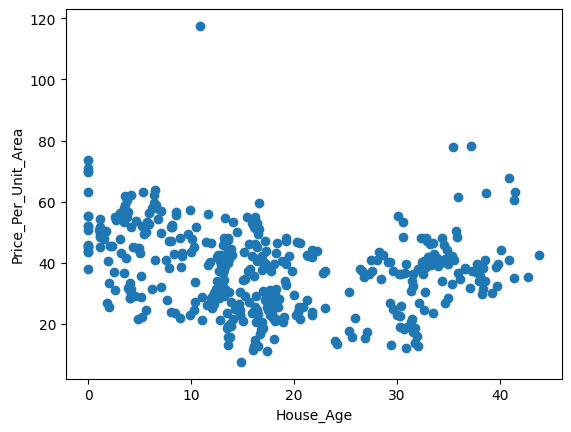

In [ ]:
plt.scatter(dataset['House_Age'],dataset['Price_Per_Unit_Area'])
plt.xlabel('House_Age')
plt.ylabel('Price_Per_Unit_Area')
plt.show()

6. Separate the feature and prediction value columns

In [ ]:
x_feature = np.array(dataset['House_Age'])
y_feature = np.array(dataset['Price_Per_Unit_Area'])

7.Write the Hypothesis Function

In [ ]:
def Hypothesis(theta_array , x) :
  return theta_array[0] + theta_array[1]*x

8. Write the Cost Function

In [ ]:
def  Cost_Function(theta_array,x,y , m):
  total_cost = 0
  for i in range(m):
    total_cost += (Hypothesis(theta_array,x[i]) - y[i])**2
  return total_cost/(2*m)

9. Write the Gradient Descent optimization algorithm

In [ ]:
def Gradient_Descent(theta_array , x, y , m ,alpha) :
  summation_0 = 0
  summation_1 = 0

  for i in range(m):
    summation_0 += (Hypothesis(theta_array,x[i]) - y[i])
    summation_1 += ((Hypothesis(theta_array,x[i]) - y[i])*x[i])

  new_theta0 = theta_array[0] - (alpha/m)*summation_0
  new_theta1 = theta_array[1] - (alpha/m)*summation_1

  new_theta = [new_theta0 , new_theta1]

  return new_theta

10.	Apply the training over the dataset to minimize the loss

In [ ]:
def Training(x, y, alpha, epochs):
    theta_0 = 0
    theta_1 = 0
    theta_array = [theta_0, theta_1]
    m = len(x)
    cost_values = []

    for i in range(epochs):
        theta_array = Gradient_Descent(theta_array, x, y, m, alpha)
        loss = Cost_Function(theta_array, x, y, m)
        cost_values.append(loss)
        y_new = theta_array[0] + theta_array[1]*x

        if(i == epochs-1 or i == 0):
          plt.plot(x, y_new , 'r')
          plt.scatter(x, y)
          plt.show()


    return cost_values , theta_array

11.	Find the best fit line to the given dataset

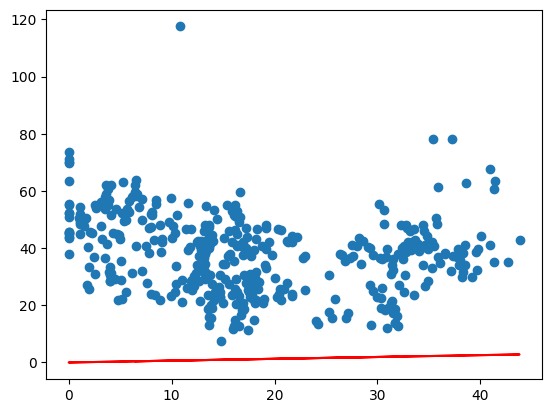

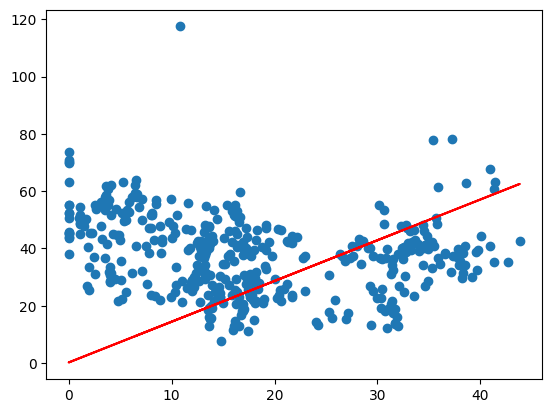

In [ ]:
alpha = 0.0001
epochs = 100
costs , theta_array = Training(x_feature  , y_feature , alpha , epochs)

12 . Plot the Learning Curve

[0.18051884024449297, 1.4228634841862595]


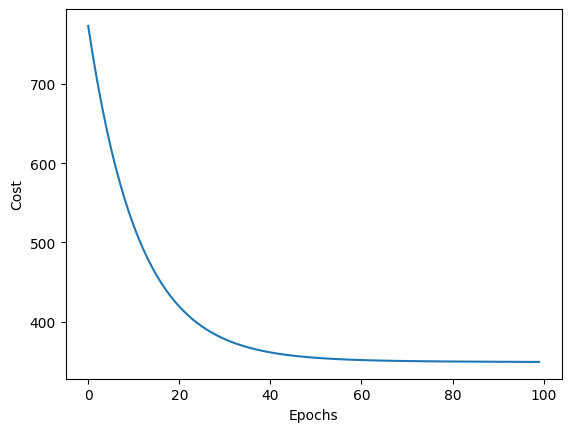

In [ ]:
print(theta_array)
x = np.arange(0, epochs)
plt.plot(x, costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()